Linear Regression Results
R²: 0.1837
RMSE: 0.1392


c:\Users\sarda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


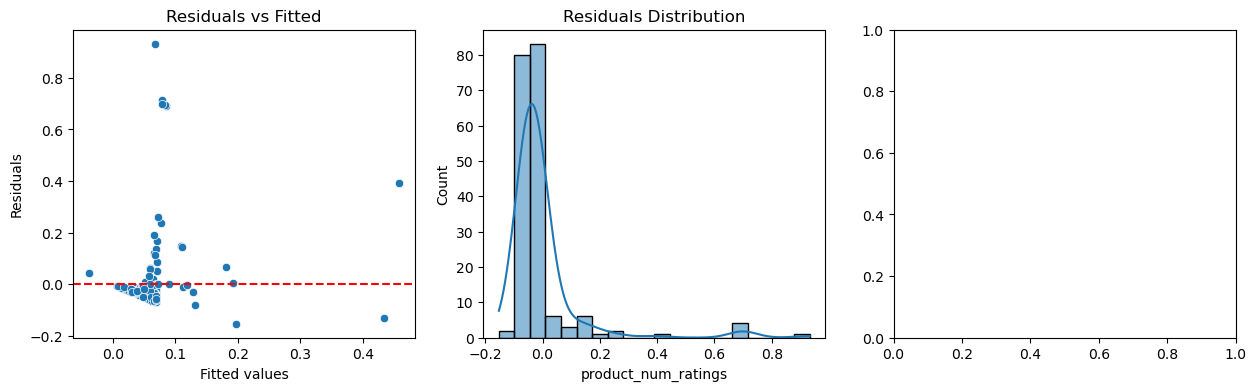

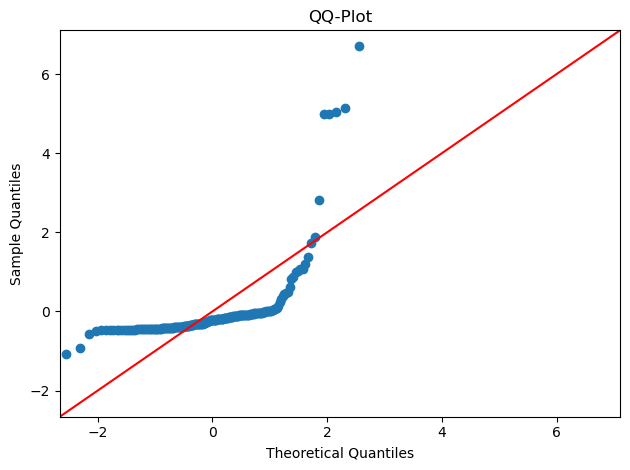


Linear Regression with price_squared
R²: 0.1885
RMSE: 0.1388


In [8]:
# -----------------------------
# 10a) Linear Regression Modeling
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# -----------------------------
# 1. Load and preprocess dataset
# -----------------------------
df = pd.read_csv("./data/processed/amazon_bestsellers_2025_cleaned.csv")

# Clean product_price: remove currency symbols, commas, etc.
df["product_price"] = (
    df["product_price"]
    .astype(str)
    .str.replace(r"[^\d.]", "", regex=True)   # keep digits and dot
    .replace("", np.nan)                      # empty strings -> NaN
    .astype(float)
)

# Drop rows with NaN price
df = df.dropna(subset=["product_price"])

# -----------------------------
# 2. Feature engineering
# -----------------------------
df["log_price"] = np.log1p(df["product_price"])              # log transform
df["review_per_price"] = df["product_num_ratings"] / (df["product_price"] + 1)

# -----------------------------
# 3. Define features and target
# -----------------------------
features = ["product_price", "log_price", "review_per_price"]
X = df[features]
y = df["product_num_ratings"]

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 4. Fit Linear Regression
# -----------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# -----------------------------
# 5. Model evaluation
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results")
print("R²:", round(r2, 4))
print("RMSE:", round(rmse, 4))

# -----------------------------
# 6. Residual diagnostics
# -----------------------------
residuals = y_test - y_pred

plt.figure(figsize=(15,4))

# Residuals vs Fitted
plt.subplot(1,3,1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")

# Histogram of residuals
plt.subplot(1,3,2)
sns.histplot(residuals, kde=True, bins=20)
plt.title("Residuals Distribution")

# QQ-plot for normality
plt.subplot(1,3,3)
sm.qqplot(residuals, line="45", fit=True)
plt.title("QQ-Plot")

plt.tight_layout()
plt.show()

# -----------------------------
# 7. Optional: Add squared feature
# -----------------------------
X_train["price_squared"] = X_train["product_price"] ** 2
X_test["price_squared"] = X_test["product_price"] ** 2

lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_pred2 = lr2.predict(X_test)

rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
r2_2 = r2_score(y_test, y_pred2)

print("\nLinear Regression with price_squared")
print("R²:", round(r2_2, 4))
print("RMSE:", round(rmse2, 4))
